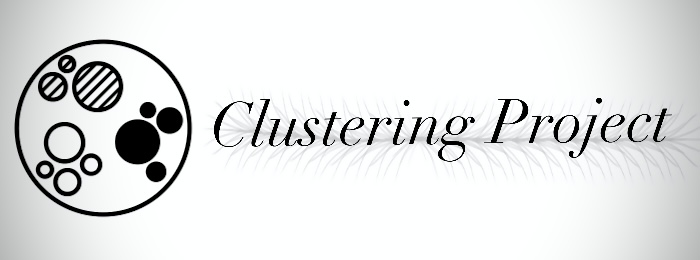

# <Center>*Clustering Project*</Center>

## Introduction

This project is a practical exemple of clustering skills (Using K-Means Algorithm). I used the **Mall Customer Segmentation Data** dataset, available on [Kaggle](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python).

### About the dataset
This dataset was created for learning purposes and consists of 200 rows with information of clients in a supermarket mall's membership. The features are:
- CustomerID
- Gender
- Age
- Annual Income (k$)
- Spending Score (1-100)

The main goal of this dataset is to understand the information about the clients and sort them accordingly to help marketing team when planning a strategy.

To achieve the goal, I used K-Means algorithm.

In [1]:
# Importing data handle libraries
import numpy as np
import pandas as pd

# Importing visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from yellowbrick.cluster import silhouette_visualizer

# Importing modeling libraries
from sklearn.cluster import KMeans

# Evaluation
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading dataset using pandas
df = pd.read_csv('Mall_Customers.csv')

# Checking first five rows
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Checking characteristics of the dataset using .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Based on that, it is possible to see that there are no missing values that need further treatment.

In [4]:
# Checking statistical information
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
# Checking skewness
df.skew()

CustomerID                0.000000
Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

The level of skewness is considered moderate (>-0.5 and <0.5), so it is not a relevant parameter for this analysis.

## Visualisation

Before modeling, I performed some plots to understand the data.

In [6]:
# I created a function to plot as many histograms I need
# In the function I added the kind of plot I want and all the details of the plot
def hist(j,col,ax):
    ax=ax[j]
    sns.histplot(x=col, data=df, kde=True, bins=20,ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(col, fontweight='bold')

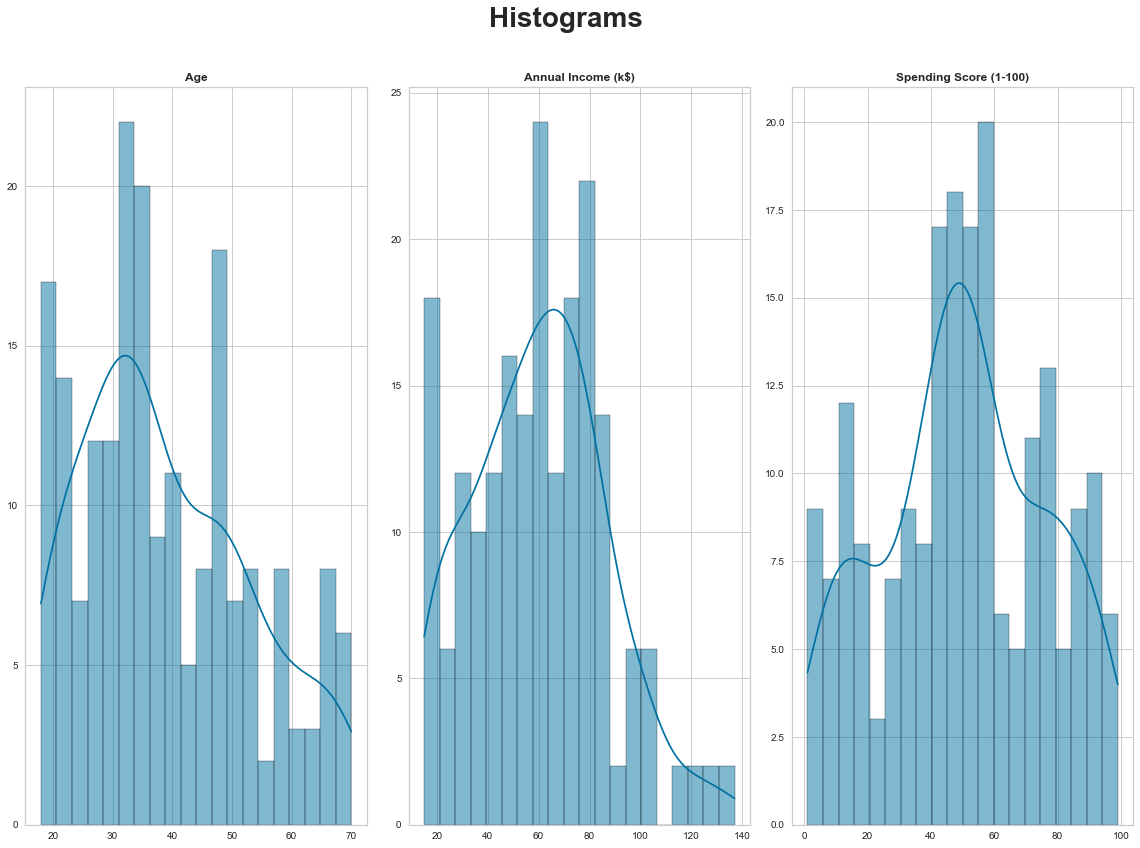

In [7]:
# I stablished the number of plots I need and a suptitle
fig, ax = plt.subplots(1,3, figsize=(16,12))
plt.suptitle('Histograms \n', fontsize=28, fontweight='bold')

# Calling the function hist with the information required (The position of the plot, name of the column and the ax)
hist(0,'Age',ax)
hist(1,'Annual Income (k$)',ax)
hist(2,'Spending Score (1-100)', ax)

# Organising the plot
plt.tight_layout();

Observing the histograms, the numerical columns are slightly skweed, which was checked before by the skewness calculation.

In [8]:
# Just like the last plot, I created a function to plot as many boxplots I need
# In the function I added the kind of plot I want and all the details of the plot
def box_plot(j,col,ax):
    ax=ax[j]
    sns.boxplot(y=col, data=df, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(col, fontweight='bold')

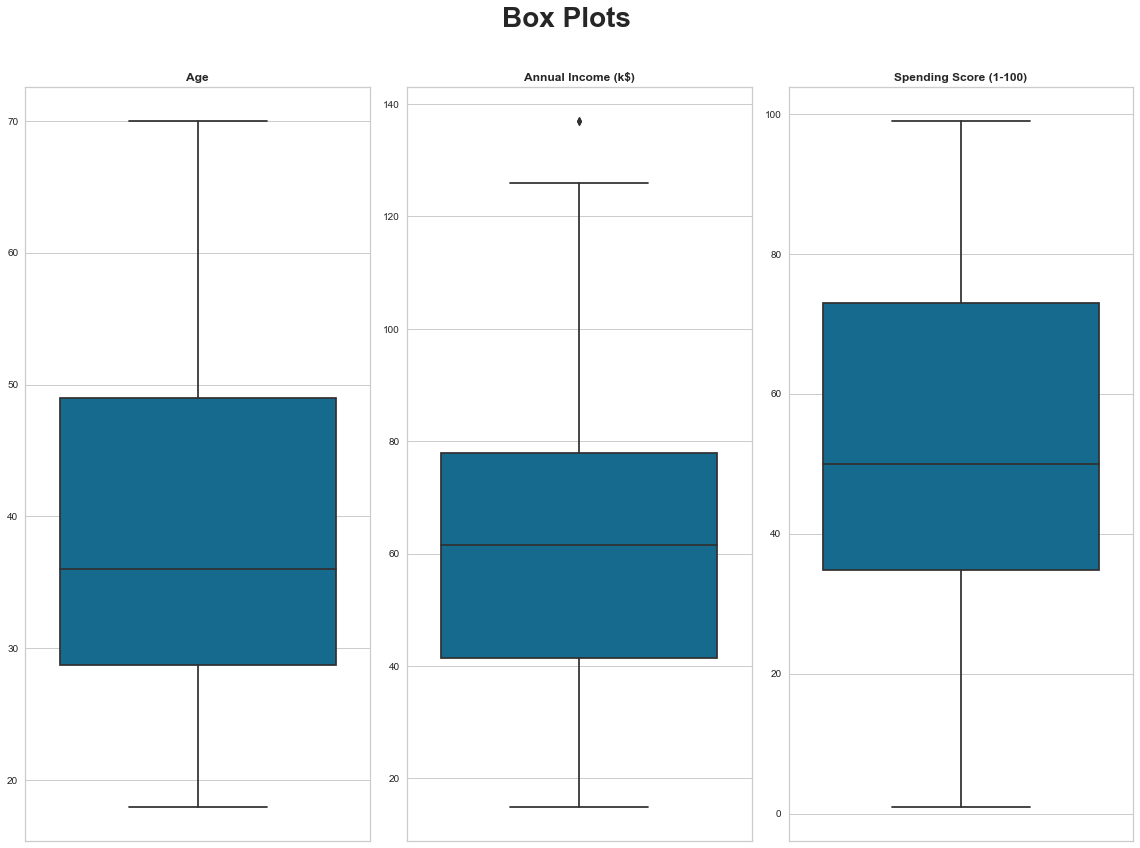

In [9]:
# I stablished the number of plots I need and a suptitle
fig, ax = plt.subplots(1,3, figsize=(16,12))
plt.suptitle('Box Plots \n', fontsize=28, fontweight='bold')

# Calling the function box_plot with the information required
box_plot(0,'Age',ax)
box_plot(1,'Annual Income (k$)',ax)
box_plot(2,'Spending Score (1-100)', ax)

# Organising the plot
plt.tight_layout();

It was identify the presence of outliers in the column Annual Income. Those will be treated shortly.

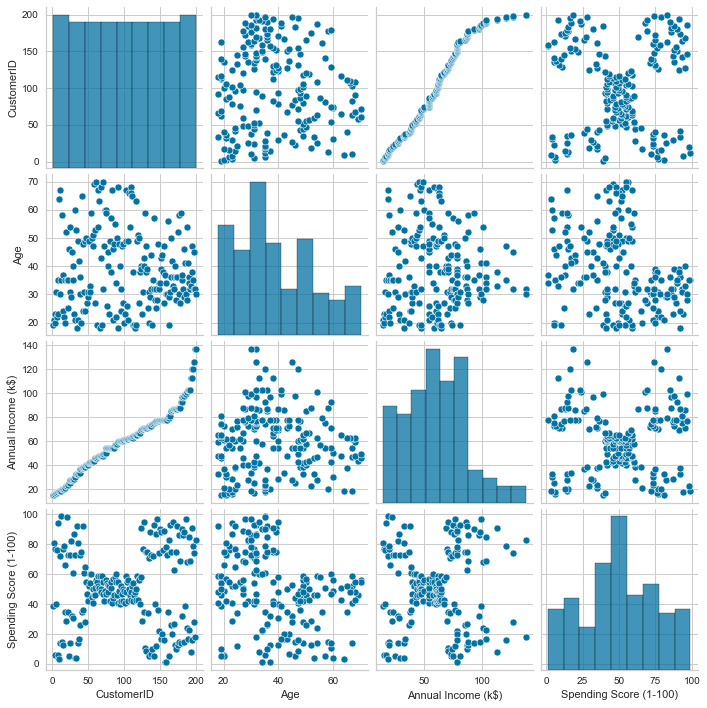

In [10]:
# I used a pairplot to check the scatter distributiong of all the variables at the same time
sns.pairplot(df);

Based on the pairplot, the Annual Income and Spending Score columns form clusters.

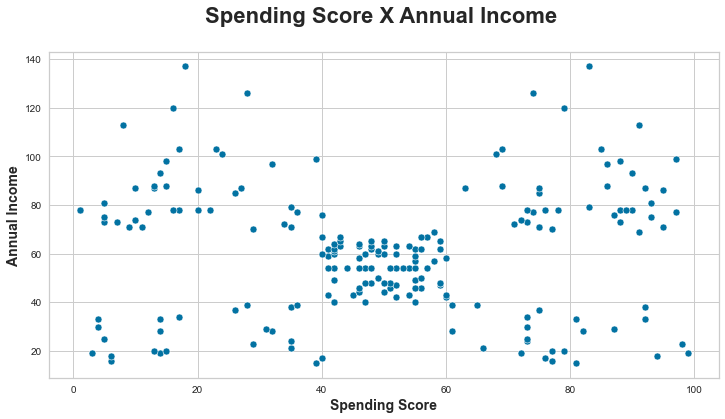

In [11]:
# Plotting the relation between Spending Score and Annual Income to check for clusters
fig, ax = plt.subplots(figsize=(12,6))
sns.scatterplot(x='Spending Score (1-100)', y='Annual Income (k$)', data=df, ax=ax)
ax.set_xlabel('Spending Score',fontsize=14, fontweight='bold')
ax.set_ylabel('Annual Income', fontsize=14, fontweight='bold')
ax.set_title('Spending Score X Annual Income \n', fontsize=22, fontweight='bold');

## Data cleaning

As detected before, there were outliers in the column Annual Income. As the dataset is quite small, I replaced the outliers by the mean of the column.

In [12]:
# To treat the outliers first I calculated the Interquartile Range (IQR)
Q1 = df['Annual Income (k$)'].quantile(0.25)
Q3 = df['Annual Income (k$)'].quantile(0.75)
IQR = Q3 - Q1

In [13]:
# Then I stablished the lower and upper limits
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
print('Lower limit is', lower)
print('Upper limit is', upper)

Lower limit is -13.25
Upper limit is 132.75


In [14]:
# Checking outliers and replacing them
outlier = []
for x in df['Annual Income (k$)']:
    if ((x> upper) or (x<lower)):
        outlier.append(x)
        df['Annual Income (k$)'].replace(x, df['Annual Income (k$)'].mean(), inplace=True)
print('Outliers on the dataset are: ', outlier)

Outliers on the dataset are:  [137, 137]


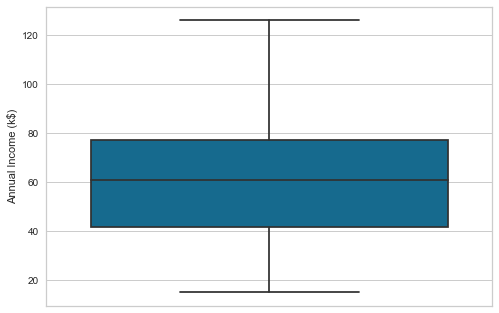

In [15]:
# Plotting graph to check if the outliers were treated
sns.boxplot(y='Annual Income (k$)', data=df);

In [16]:
# Encoding categorical variable Gender
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

In [17]:
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,1,19,15.0,39,1
1,2,21,15.0,81,1
2,3,20,16.0,6,0
3,4,23,16.0,77,0
4,5,31,17.0,40,0


## Modeling using K-Means

In [18]:
# Defining X as the two columns to be clustered
X = df[['Spending Score (1-100)', 'Annual Income (k$)']]

In [19]:
# I used the elbow method and the silhouette score to find the optimal number of clusters

WCSS = []                               # Within Cluster Sum of Squares
Silhouette_scores = []
cluster = range(2,11)
for k in cluster:
    kmeans = KMeans(n_clusters=k, random_state=123)
    df_km = kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    WCSS.append(df_km.inertia_)
    Silhouette_scores.append(score)

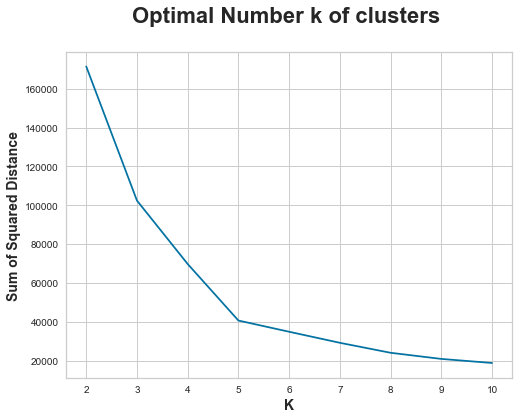

In [20]:
# Plotting the elbow curve
plt.figure(figsize=(8,6))
plt.plot(cluster, WCSS)
plt.xlabel('K', fontsize=14, fontweight='bold')
plt.ylabel('Sum of Squared Distance', fontsize=14, fontweight='bold')
plt.title('Optimal Number k of clusters \n', fontsize=22, fontweight='bold');

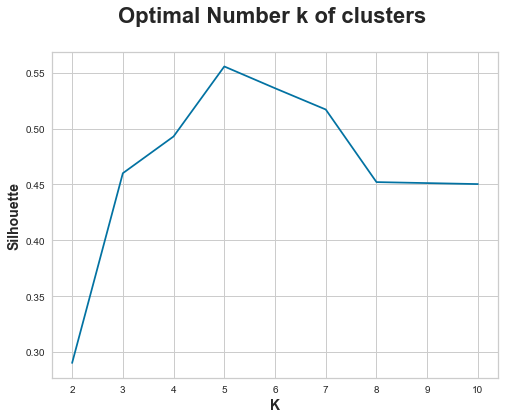

In [21]:
# Plotting the silhouette curve
plt.figure(figsize=(8,6))
plt.plot(cluster, Silhouette_scores)
plt.xlabel('K', fontsize=14, fontweight='bold')
plt.ylabel('Silhouette', fontsize=14, fontweight='bold')
plt.title('Optimal Number k of clusters \n', fontsize=22, fontweight='bold');

According to both graphs the optimal number of clusters is k=5.

In [22]:
# Applying KMeans to n_clusters=5
kmeans = KMeans(n_clusters=5, random_state=123)
pred = kmeans.fit_predict(X)

In [23]:
# Creating column with the predicted clusters
df['Cluster'] = pred
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,Cluster
0,1,19,15.0,39,1,0
1,2,21,15.0,81,1,4
2,3,20,16.0,6,0,0
3,4,23,16.0,77,0,4
4,5,31,17.0,40,0,0


In [24]:
# Position of the centroids
kmeans.cluster_centers_

array([[20.91304348, 26.30434783],
       [82.12820513, 84.57846154],
       [49.7125    , 55.0875    ],
       [17.58333333, 85.62666667],
       [79.36363636, 25.72727273]])

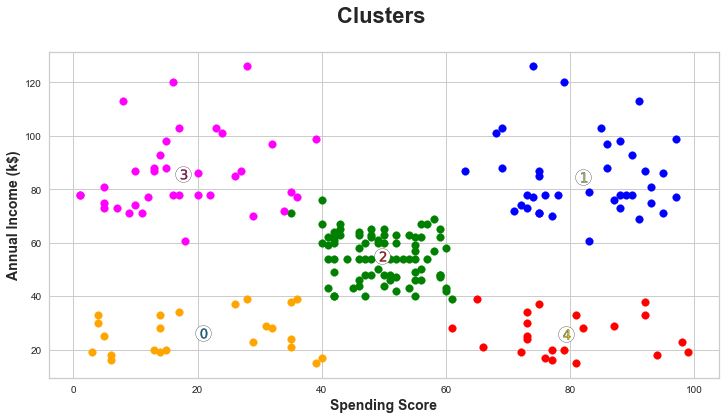

In [25]:
# Plotting the clusters with their respective centroids
plt.figure(figsize=(12,6))

plt.scatter(df[df['Cluster'] == 0]['Spending Score (1-100)'], df[df['Cluster'] == 0]['Annual Income (k$)'],
            s=60, c='orange', label='Cluster 0')
plt.scatter(df[df['Cluster'] == 1]['Spending Score (1-100)'], df[df['Cluster'] == 1]['Annual Income (k$)'],
            s=60, c='blue', label='Cluster 1')
plt.scatter(df[df['Cluster'] == 2]['Spending Score (1-100)'], df[df['Cluster'] == 2]['Annual Income (k$)'],
            s=60, c='green', label='Cluster 2')
plt.scatter(df[df['Cluster'] == 3]['Spending Score (1-100)'], df[df['Cluster'] == 3]['Annual Income (k$)'],
            s=60, c='magenta', label='Cluster 3')
plt.scatter(df[df['Cluster'] == 4]['Spending Score (1-100)'], df[df['Cluster'] == 4]['Annual Income (k$)'],
            s=60, c='red', label='Cluster 4')

# Plotting centroids and enumerating them
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=250, marker='o',
            c="white", alpha=1, edgecolors='k')

for i, c in enumerate(kmeans.cluster_centers_):
    plt.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=100, edgecolor='k')

plt.title('Clusters \n', fontsize=22, fontweight='bold')
plt.xlabel('Spending Score', fontsize=14, fontweight='bold')
plt.ylabel('Annual Income (k$)', fontsize=14, fontweight='bold');

In [26]:
# Evaluating first model using Silhouette Coefficient
score = silhouette_score(X, kmeans.labels_)
print('Silhouette Score: %.2f' % score)

Silhouette Score: 0.56


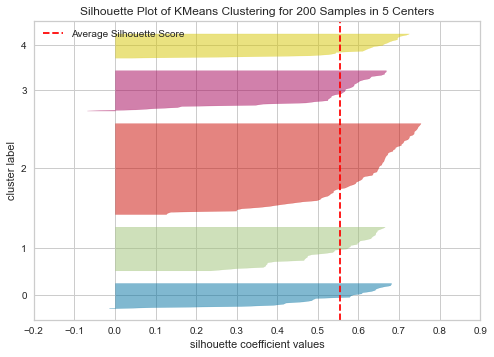

In [27]:
# Showing the silhouette plot
silhouette_visualizer(kmeans, X, colors='yellowbrick');

All the clusters have approximately the same size and thickness is following a pattern, which indicates that 5 clusters was the best option to sort the data.
Based on the results of the model, the clients can be grouped as:
- **First Group:** Low Annual Income and Low Spending Score
- **Second Group:** High Annual Income and High Spending Score
- **Third Group:** Average Annual Income and Average Spending Score (The bigger group according to the graph above)
- **Fourth Group:** High Annual Income and Low Spending Score
- **Fifth Group:** Low Annual Income and High Spending Score

Now it will be possible to create marketing strategies more effective for each group.